<a href="https://colab.research.google.com/github/rnlima8/Aula_do_dia_06out/blob/main/JJ3NB15_02__Regress%C3%A3o%2520Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b><i>MACHINE LEARNING WITH PYTHON</i></b></h1></center>
<center><h1><b><i>APRENDIZAGEM SUPERVISIONADA</i></b></h1></center>
<center><h1><b><i>MODELOS DE REGRESSÃO (LINEAR E LOGÍSTICA)</i></b></h1></center>

Fonte: https://realpython.com/linear-regression-in-python/

Passos para implementação da Regressão Linear:

* (1) Importar as libraries necessárias;
* (2) Carregar os dados;
* (3) Aplicar as transformações necessárias: outliers, NaN's, normalização (MinMaxScaler, RobustScaler, StandarScaler, Log, Box-Cox e etc);
* (4) DataViz dos dados: entender os relacionamentos, distribuições e etc presente nos dados;
* (5) Construir e treinar o modelo preditivo (neste caso, modelo de regressão);
* (6) Validar/verificar as métricas para avaliação do(s) modelo(s);
* (7) Predições.

# Melhorias da sessão:
* Calcular as correlações antes e depois da RIDGE e LASSO para mostrar a multicolinearidade e explicar porque determinadas colunas "deixam" de ser importantes.

# Modelos de Regressão com Regularization para Classificação e Regressão

## Regressão Linear Simples (usando OLS - Ordinary Least Squares)

* Features $X_{np}$: é uma matriz de dimensão nxp contendo os atributos/variáveis preditoras do dataframe (variáveis independentes);
* Variável target/dependente representada por y;
* Relação entre X e y é representado pela equação abaixo, onde $w_{i}$ representa os pesos de cada coeficiente e $w_{0}$ representa o intercepto.

<img src="https://github.com/awantik/machine-learning-slides/blob/master/lm1.PNG?raw=true" width="300">

![X_y](https://github.com/MathMachado/Materials/blob/master/Architecture.png?raw=true)

* Soma de Quadrados dos Resíduos (RSS) - Soma de Quadrados das diferenças entre os valores observados e preditos.

<img src="https://github.com/awantik/machine-learning-slides/blob/master/lm2.PNG?raw=true" width="500">

## Principais parâmetros do algoritmo:
* fit_intercept - Indica se o intercepto $w_{0}$ deve ou não ser ajustado. Se os dados estão normalizados, então não faz sentido ajustar o intercepto $w_{0}$.

* normalize - $X$ será automaticamente normalizada (subtrai a média e divide pelo desvio-padrão);

## Atributos do modelo de Machine Learning para Regressão
* coef - peso/fator de cada variável independente do modelo de ML;

* intercepto $w_{0}$ - intercepto ou viés de $y$;

## Funções para ajuste do ML:
* fit - treina o modelo com as matrizes $X$ e $y$;
* predict - Uma vez que o modelo foi treinado, para um dado $X$, use $y$ para calcular os valores preditos de $y$ (y_pred).

<hr/>

# Limitações do OLS (Ordinary Least Squares):
* Impactado/sensível à Outliers;
* Multicolinearidade; 
* Heterocedasticidade - apresenta-se como uma forte dispersão dos dados em torno de uma reta;

* <a href="http://www.clockbackward.com/2009/06/18/ordinary-least-squares-linear-regression-flaws-problems-and-pitfalls/">References</a>

### Importar as libraries

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

### Carregar os dados
* Vamos carregar o dataset [Boston House Pricing](https://archive.ics.uci.edu/ml/datasets/housing)

In [ ]:
from sklearn.datasets import load_boston, load_iris

In [ ]:
boston = load_boston()
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [ ]:
# Nomes das colunas, variáveis, atributos
load_boston().feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
#url = 'https://raw.githubusercontent.com/MathMachado/DSWP/master/Dataframes/housing.csv'

# Variáveis preditoras
df_boston = pd.DataFrame(load_boston().data, columns = load_boston().feature_names)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
# Variável target/resposta
df_boston['preco'] = load_boston().target
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,preco
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Data Transformation

#### Normalização/padronização dos nomes das colunas

In [ ]:
# Renomear as colunas do dataframe
df_boston.columns = [col.lower() for col in df_boston.columns]

In [ ]:
df_boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,preco
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Outliers

#### Missing values

In [ ]:
# Missing values por colunas/variáveis
df_boston.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
preco      0
dtype: int64

In [ ]:
# Número de atributos
len(load_boston().feature_names)

13

In [ ]:
# Missing Values por linhas
df_boston[df_boston.isnull().any(axis = 1)]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,preco


#### Estatísticas Descritivas

In [ ]:
df_boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,preco
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Análise de Correlação

In [ ]:
correlacoes = df_boston.corr()
correlacoes

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,preco
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


##### Gráfico das correlações entre as features/variáveis/colunas
Source: https://seaborn.pydata.org/examples/many_pairwise_correlations.html



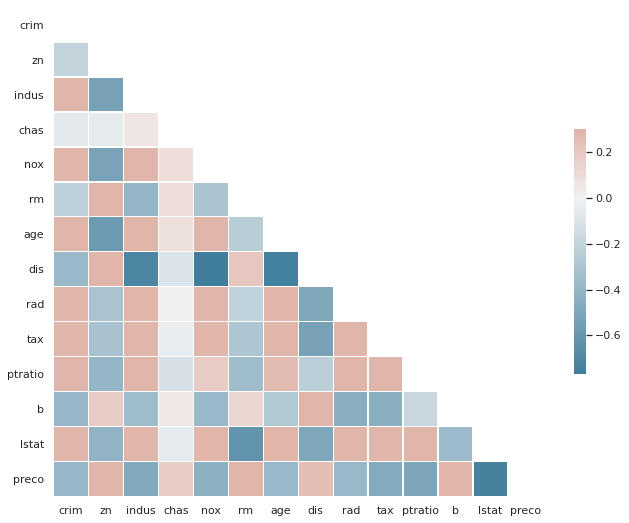

In [ ]:
import seaborn as sns
from string import ascii_letters
import matplotlib.pyplot as plt

sns.set_theme(style = "white")

d = df_boston

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Construir e treinar o(s) modelo(s)

$X = [X_{1}, X_{2}, X_{p}]$ = X_boston abaixo.

In [ ]:
X_boston = df_boston.drop(columns = ['preco'], axis = 1) # todas as variáveis/atributos, exceto 'preco'
y_boston = df_boston['preco'] # variável-target

In [ ]:
X_boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
y_boston[0:10] # Series (coluna)

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
Name: preco, dtype: float64

In [ ]:
# Definindo os dataframes de treinamento e teste:
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X_boston, 
                                                                  y_boston, 
                                                                  test_size = 0.2, 
                                                                  random_state = 20111974)

In [ ]:
print(f"Dataframe de treinamento: {X_treinamento.shape[0]} linhas")
print(f"Dataframe de teste......: {X_teste.shape[0]} linhas")

Dataframe de treinamento: 404 linhas
Dataframe de teste......: 102 linhas


#### Treinamento do modelo de Regressão Linear

In [ ]:
# Importa a library LinearRegression --> Para treinamento da Regressão Linear
from sklearn.linear_model import LinearRegression

# Library para statmodels
import statsmodels.api as sm

In [ ]:
# Instancia o objeto
regressao_linear = LinearRegression()

In [ ]:
# Treina o modelo usando as amostras/dataset de treinamento: X_treinamento e y_treinamento 
regressao_linear.fit(X_treinamento, y_treinamento)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Valor do intercepto
regressao_linear.intercept_

35.9020918753502

In [ ]:
# Coeficientes do modelo de Regressão Linear
coeficientes_regressao_linear = pd.DataFrame([X_treinamento.columns, regressao_linear.coef_]).T
coeficientes_regressao_linear = coeficientes_regressao_linear.rename(columns={0: 'Feature/variável/coluna', 1: 'Coeficientes'})
coeficientes_regressao_linear

,Feature/variável/coluna,Coeficientes
0,crim,-0.0822083
1,zn,0.0428002
2,indus,0.0756011
3,chas,3.16348
4,nox,-19.4945
5,rm,3.98161
6,age,0.00480929
7,dis,-1.37396
8,rad,0.298883
9,tax,-0.0123962


#### Usando statmodels

In [ ]:
X2_treinamento = sm.add_constant(X_treinamento)
lm_sm = sm.OLS(y_treinamento, X2_treinamento).fit()
print(lm_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     78.97
Date:                Tue, 27 Oct 2020   Prob (F-statistic):          1.48e-100
Time:                        19:37:37   Log-Likelihood:                -1214.8
No. Observations:                 404   AIC:                             2458.
Df Residuals:                     390   BIC:                             2514.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.9021      6.037      5.947      0.0

#### Exclusão da variável menos significativa para o modelo: 'age'

In [ ]:
X3 = X_treinamento.drop(columns = 'age', axis = 1)
X3_treinamento = sm.add_constant(X3)
lm_sm2 = sm.OLS(y_treinamento, X3_treinamento).fit()
print(lm_sm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     85.75
Date:                Tue, 27 Oct 2020   Prob (F-statistic):          1.64e-101
Time:                        19:37:37   Log-Likelihood:                -1214.8
No. Observations:                 404   AIC:                             2456.
Df Residuals:                     391   BIC:                             2508.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.7325      6.006      5.950      0.0

#### Exclusão da variável menos significativa para o modelo: 'indus'

In [ ]:
X4 = X3_treinamento.drop(columns = 'indus', axis = 1)
X4_treinamento = sm.add_constant(X4)
lm_sm3 = sm.OLS(y_treinamento, X4_treinamento).fit()
print(lm_sm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     93.42
Date:                Tue, 27 Oct 2020   Prob (F-statistic):          2.86e-102
Time:                        19:37:37   Log-Likelihood:                -1215.4
No. Observations:                 404   AIC:                             2455.
Df Residuals:                     392   BIC:                             2503.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.4757      6.001      5.911      0.0

#### Exclusão da variável menos significativa para o modelo: 'crim'

In [ ]:
X5 = X4_treinamento.drop(columns = 'crim', axis = 1)
X5_treinamento = sm.add_constant(X5)
lm_sm4 = sm.OLS(y_treinamento, X5_treinamento).fit()
print(lm_sm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     101.8
Date:                Tue, 27 Oct 2020   Prob (F-statistic):          1.55e-102
Time:                        19:37:37   Log-Likelihood:                -1217.2
No. Observations:                 404   AIC:                             2456.
Df Residuals:                     393   BIC:                             2500.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.9950      5.968      5.696      0.0

### Conclusão
* Quais variáveis/colunas/atributos ficam no modelo?
* **Muito importante (exercício)**: normalizar (MinMaxScaler) as covariáveis e refazer a análise.
* Nesta iteração (depois de excluirmos (nesta ordem) as variáveis age, indus e crim, não surge nenhuma outra variável insignificante ao nível de 5 (na verdade, o maior valor é 1.9%).

### Validação do(s) modelo(s)

### Predições

### Deployment da solução **analítica**

# Regularized Regression Methods 
## Ridge Regression - Penalized Regression
> Reduz a complexidade do modelo através do uso de todas as variáveis de $X$, mas penalizando (valor de $\alpha$) os coeficientes $w_{i}$ quando estiverem muito longe de zero, forçando-os a serem pequenos de maneira contínua. Dessa forma, diminuímos a complexidade do modelo enquanto mantemos todas as variáveis no modelo.
* Menor impacto dos outliers.

### Exemplo

In [ ]:
# Matriz de covariáveis do modelo:
X_new = [[0, 0], [0, 0], [1, 1]]
X_new2 = [[0, 0], [0, 1.5], [1, 1]]

y_new = [0, .1, 1]

In [ ]:
X_new # 2 variáveis/colunas no dataframe

[[0, 0], [0, 0], [1, 1]]

In [ ]:
y_new

[0, 0.1, 1]

### Sem outliers

In [ ]:
ridge = Ridge(alpha = .1)
ridge.fit(X_new, y_new)
ridge.coef_ # Coeficientes da Ridge

array([0.44, 0.44])

### Com outliers

In [ ]:
ridge = Ridge(alpha = .1)
ridge.fit(X_new2, y_new)
ridge.coef_

array([0.81, 0.08])

#### Conseguiram visualizar o impacto dos outliers?

### Aplicação da Regressão Ridge no dataframe Boston Housing Price.

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.1) # Definição do valor de alpha da regressão ridge
lr = LinearRegression()

In [ ]:
# Ao inves de: regressao_linear.fit(X_treinamento, y_treinamento)
ridge.fit(X_treinamento, y_treinamento)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

#### Peso/contribuição das variáveis para a regressão usando RIDGE

In [ ]:
df_boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'preco'],
      dtype='object')

In [ ]:
ridge.coef_

array([-0.08, 0.04, 0.07, 3.14, -18.00, 3.99, 0.00, -1.35, 0.30, -0.01,
       -0.97, 0.01, -0.53])

In [ ]:
# treinando a regressão Ridge
ridge.fit(X_treinamento, y_treinamento)

# treinando a regressão linear simples (OLS)
lr.fit(X_treinamento, y_treinamento)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
ridge.alpha

0.1

#### $\alpha = 0.01$

In [ ]:
# maior alpha --> mais restrição aos coeficientes; 
# Menor alpha --> mais generalização, e Ridge se assemelha da OLS; Se alpha = 0 ==> Ridge = OLS.
rr = Ridge(alpha = 0.01) # Quanto mais próximo de 0 ==> Ridge = OLS
rr.fit(X_treinamento, y_treinamento)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
# MSE = Erro Quadrático Médio
from sklearn.metrics import mean_squared_error

rr_model=(mean_squared_error(y_true = y_treinamento, y_pred = rr.predict(X_treinamento)))
lr_model=(mean_squared_error(y_true = y_treinamento, y_pred = lr.predict(X_treinamento)))

In [ ]:
print(rr_model)

23.94639697817076


In [ ]:
print(lr_model)

23.946319854597377


### Coeficientes da Ridge:

In [ ]:
# Lista das variáveis + coeficientes da Ridge:
list(zip(X_treinamento.columns, abs(ridge.coef_)))

[('crim', 0.08087280884194979),
 ('zn', 0.0431105323320636),
 ('indus', 0.06967744483334821),
 ('chas', 3.144789492713716),
 ('nox', 17.9983019701622),
 ('rm', 3.9867565296916703),
 ('age', 0.0035446489044452497),
 ('dis', 1.3530395756206453),
 ('rad', 0.29504291572154007),
 ('tax', 0.012511527307639232),
 ('ptratio', 0.9682821087614826),
 ('b', 0.009027440635645128),
 ('lstat', 0.5291356457993021)]

### Experimente vários outros valores para $\alpha$ como, por exemplo, $\alpha = 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000$

#### $\alpha = 100$

In [ ]:
rr100 = Ridge(alpha = 100)
rr100.fit(X_treinamento, y_treinamento)
train_score=lr.score(X_treinamento, y_treinamento)
test_score=lr.score(X_teste, y_teste)
Ridge_treinamento_score = rr.score(X_treinamento,y_treinamento)

In [ ]:
# MSE
rr100_model = (mean_squared_error(y_true = y_treinamento, y_pred = rr100.predict(X_treinamento)))
lr_model = (mean_squared_error(y_true = y_treinamento, y_pred = lr.predict(X_treinamento)))

In [ ]:
print(rr100_model)

26.460105089888508


In [ ]:
print(lr_model)

23.946319854597377


### Próximo passo: fazer o statmodel dos modelos ridge.

# LASSO (Least Absolute Shrinkage And Selection Operator regularization)
* Método mais comum e usado para Regularization; 
* Reduz overfitting;
* Se encarrega do **Feature Selection**, pois descarta variáveis altamente correlacionadas.

* Usado no processo de Regularization - processo de penalizar as variáveis para manter somente os atributos mais importantes. Pense na utilidade disso diante de um dataframe com muitas variáveis;
* A regressão Lasso vem com um parâmetro ($\alpha$), e quanto maior o alfa, a maioria dos coeficientes de recurso é zero. Ou seja, quando $\alpha = 0$, a regressão Lasso produz os mesmos coeficientes que uma regressão linear. Quando alfa é muito grande, todos os coeficientes são zero.

### Exemplo LASSO

In [ ]:
X_new

[[0, 0], [0, 0], [1, 1]]

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = .1)
lasso.fit(X_new, y_new)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso.coef_

array([0.50, 0.00])

### Aplicação do LASSO no Boston Housing Price

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = .1)
lasso.fit(X_treinamento, y_treinamento)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso.coef_

array([-0.07, 0.05, 0.00, 1.57, -0.00, 3.78, -0.01, -1.06, 0.26, -0.01,
       -0.78, 0.01, -0.59])

### Coeficientes do LASSO:

In [ ]:
list(zip(X_treinamento.columns, abs(lasso.coef_)))

[('crim', 0.06530501689285828),
 ('zn', 0.04699294932304524),
 ('indus', 0.002030456305853612),
 ('chas', 1.5663885184641415),
 ('nox', 0.0),
 ('rm', 3.779546713514268),
 ('age', 0.006404324032734558),
 ('dis', 1.0612931166345525),
 ('rad', 0.2580730613206583),
 ('tax', 0.014270830653978057),
 ('ptratio', 0.7817739916684686),
 ('b', 0.009950918490594119),
 ('lstat', 0.5874528237350962)]

### Comparação com os coeficientes do RIDGE:

In [ ]:
list(zip(X_treinamento.columns, abs(ridge.coef_)))

[('crim', 0.08087280884194979),
 ('zn', 0.0431105323320636),
 ('indus', 0.06967744483334821),
 ('chas', 3.144789492713716),
 ('nox', 17.9983019701622),
 ('rm', 3.9867565296916703),
 ('age', 0.0035446489044452497),
 ('dis', 1.3530395756206453),
 ('rad', 0.29504291572154007),
 ('tax', 0.012511527307639232),
 ('ptratio', 0.9682821087614826),
 ('b', 0.009027440635645128),
 ('lstat', 0.5291356457993021)]

**Conclusão**: Coeficientes zero podem ser excluídos da Análise/modelo.

### Efeito dos valores de $\alpha$
* Função adaptada de https://chrisalbon.com/machine_learning/linear_regression/effect_of_alpha_on_lasso_regression/.

In [ ]:
# Create a function called lasso,
def lasso(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of lasso regressions from each alpha.
    '''
    # Create an empty data frame
    df = pd.DataFrame()
    
    # Create a column of feature names
    df['Feature Name'] = names
    
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a lasso regression with that alpha value,
        lasso = Lasso(alpha = alpha)
        
        # Fit the lasso regression
        lasso.fit(X_treinamento, y_treinamento)
        
        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        df[column_name] = lasso.coef_
        
    # Return the datafram    
    return df

In [ ]:
names = X_treinamento.columns

# Valores de alpha:
lasso([.0001, .001, 0, .01, .1, 1, 10, 100])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4837.156610628664, tolerance: 3.514187175742573
  positive)


,Feature Name,Alpha = 0.000100,Alpha = 0.001000,Alpha = 0.000000,Alpha = 0.010000,Alpha = 0.100000,Alpha = 1.000000,Alpha = 10.000000,Alpha = 100.000000
0,crim,-0.082177,-0.081898,-0.082208,-0.079113,-0.065305,-0.043175,-0.000000,-0.000000
1,zn,0.042807,0.042870,0.042800,0.043501,0.046993,0.046511,0.022907,0.000000
2,indus,0.075467,0.074263,0.075601,0.062217,0.002030,0.000000,-0.000000,-0.000000
3,chas,3.161817,3.146879,3.163476,2.997491,1.566389,0.000000,0.000000,0.000000
4,nox,-19.459924,-19.148839,-19.494487,-16.038598,-0.000000,-0.000000,0.000000,-0.000000
5,rm,3.981502,3.980542,3.981609,3.970900,3.779547,0.767123,0.000000,0.000000
6,age,0.004784,0.004558,0.004809,0.002299,-0.006404,0.027700,0.000000,-0.000000
7,dis,-1.373444,-1.368773,-1.373963,-1.322091,-1.061293,-0.603672,-0.000000,0.000000
8,rad,0.298800,0.298060,0.298883,0.290667,0.258073,0.263029,0.000000,-0.000000
9,tax,-0.012399,-0.012425,-0.012396,-0.012688,-0.014271,-0.014111,-0.007210,-0.018972


### Capturando os elementos mais importantes

In [ ]:
r_squared = model.rsquared
r_squared_adj = model.rsquared_adj
coeficientes_regressao = model.params

VEJA: https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression

### Cross-Validation & GridSearch para LASSO

### Colocar aqui a fórmula do RMSE.

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

In [ ]:
# define model evaluation method
cv = RepeatedKFold(n_splits = 5, n_repeats = 3, random_state = 20111974)

In [ ]:
# define model
model = LassoCV(alphas = np.arange(0.001, 10, 0.001), cv = cv, n_jobs = -1)

In [ ]:
# fit model
model.fit(X_treinamento, y_treinamento)

LassoCV(alphas=array([0.00, 0.00, 0.00, ..., 10.00, 10.00, 10.00]), copy_X=True,
        cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=20111974),
        eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=-1,
        normalize=False, positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [ ]:
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

alpha: 0.001000


# Elastic Net  
* Combina o poder de Ridge e LASSO;
* Remove variáveis de pouco poder preditivo (LASSO) ou as penaliza (Ridge).

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Instancia o objeto
en = ElasticNet(alpha = .1)

transformacao.fit(dados_que_eu_quero_transformar)

In [ ]:
en.fit(X_treinamento, y_treinamento)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
list(zip(X_treinamento, en.coef_))

[('crim', -0.07143751053094904),
 ('zn', 0.0498062892363724),
 ('indus', 0.0032576429776668353),
 ('chas', 1.3239836713973603),
 ('nox', -0.11664802487965203),
 ('rm', 3.2904034517697442),
 ('age', -0.003099848702137109),
 ('dis', -1.0767387220229074),
 ('rad', 0.2808232363611885),
 ('tax', -0.015070381582031977),
 ('ptratio', -0.8133764497234329),
 ('b', 0.009703976555020394),
 ('lstat', -0.6218862788685706)]

### GridSearch para encontrar o $\alpha$ para Elastic Net

In [ ]:
# Instancia o objeto:
en = ElasticNet(normalize = True)

# Otimização dos hiperparâmetros:
d_hiperparametros = {'alpha': np.logspace(-5, 2, 8), 
                     'l1_ratio': [.2, .4, .6, .8]}

search = GridSearchCV(estimator = en, # Elastic Net
                      param_grid = d_hiperparametros, # Dicionário com os hiperparâmetros
                      scoring = 'mean_squared_error', # MSE (Erro Quadrático Médio) - Métrica para avaliação da performance do modelo
                      #scoring = 'neg_mean_squared_error',
                      n_jobs = -1, # Usar todos os processadores/computação
                      refit = True, 
                      cv = 10) # Número de Cross-Valitations

### Exercício (Estatística): Sugestão de ajuste manual
* Estudar estatisticamente a distribuição de frequência em que a variável é significante (ao nível de 5%) em 100 fits.

In [ ]:
for i in range(0, 100):
    X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, 0.2)
    modeloi = fit(X_treinamento, y_treinamento)
    intercepto
    coeficientes da regressão
    validação dos parâmetros (significância)
    y_predict = predict(X_teste)

In [ ]:
search.fit(X_treinamento, y_treinamento)

# Retorna os melhores hiperparâmetros do algoritmo:
search.best_params_

{'alpha': 0.0001, 'l1_ratio': 0.4}

In [ ]:
en2 = ElasticNet(normalize = True, alpha = 0.001, l1_ratio = 0.6)
en2.fit(X_treinamento, y_treinamento)

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.6,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:

# Métrica
ml2 = (mean_squared_error(y_true = y_teste, y_pred = en2.predict(X_teste)))
# Encontrar a métrica neg_squared_error --> ml3 = (neg_mean_squared_error(y_true = y_teste, y_pred = en2.predict(X_teste)))

In [ ]:
print(f"MSE: {ml2}")

MSE: 15.410850398354441


**Conclusão**:
* Comparação dos MSE - A Regressão sem Regularization produziu MSE de 23.94. Como podemos ver, Elastic Net produz MSE: 15.4.

### Coeficientes do Elastic Net:

In [ ]:
list(zip(X_treinamento.columns, abs(ridge.coef_)))

[('crim', 0.08087280884194979),
 ('zn', 0.0431105323320636),
 ('indus', 0.06967744483334821),
 ('chas', 3.144789492713716),
 ('nox', 17.9983019701622),
 ('rm', 3.9867565296916703),
 ('age', 0.0035446489044452497),
 ('dis', 1.3530395756206453),
 ('rad', 0.29504291572154007),
 ('tax', 0.012511527307639232),
 ('ptratio', 0.9682821087614826),
 ('b', 0.009027440635645128),
 ('lstat', 0.5291356457993021)]

Observe acima que o segundo coeficiente foi estimado como 0 e, desta forma, podemos excluí-lo do ML.

# Elastic Net  
* Combina o poder de Ridge e LASSO;
* Remove variáveis de pouco poder preditivo (LASSO) ou as penaliza (Ridge).

In [ ]:
from sklearn.linear_model import ElasticNet

# Instancia o objeto
en = ElasticNet(alpha = .1)

In [ ]:
en.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
en.coef_

array([0.33, 0.33])

# Regressão Logística
* Na regressão linear nós tentamos modelar a relação linear entre as features ($X_{np} = [X_{1}, X_{2}, ..., X_{p}]$) através de uma reta dada pela equação:

$$\hat{y}= \beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+...+\beta_{p}x_{p}$$

Para classificação, a Regressão Logística vai nos retornar probabilidades (entre 0 e 1), dada pela equação logística ( também conhecida **função sigmoid**):

$$P[y = 1]= \frac{1}{1+e^{-(\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+...+\beta_{p}x_{p})}}$$




![SigmoidFunction](https://github.com/MathMachado/Materials/blob/master/SigmoidFunction.PNG?raw=true)

# Exemplo 1

### Carregar as libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Gráficos
import seaborn as sns # Gráficos
%matplotlib inline

# Classificadores
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Métricas
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score, confusion_matrix, auc

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Carregar os dados

In [ ]:
url = 'https://raw.githubusercontent.com/MathMachado/DataFrames/master/Titanic_Original.csv'
df_titanic = pd.read_csv(url)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df_titanic.columns = [coluna.lower() for coluna in df_titanic.columns]
df_titanic.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Distribuição da variável-target/variável-resposta:

In [ ]:
df_titanic.shape

(891, 12)

In [ ]:
100*(df_titanic['survived'].value_counts()/df_titanic.shape[0])

0    61.616162
1    38.383838
Name: survived, dtype: float64

In [ ]:
df_titanic.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Extrair insights de 'pclass'

In [ ]:
df_titanic.dtypes

passengerid      int64
survived         int64
pclass           int64
name            object
sex             object
age            float64
sibsp            int64
parch            int64
ticket          object
fare           float64
cabin           object
embarked        object
dtype: object

#### Transformar 'pclass' em categórico:

In [ ]:
df_titanic['pclass2'] = df_titanic['pclass'].astype('category')

### Construção da 1ª versão do modelo (baseline)

In [ ]:
df_titanic.head(2)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,pclass2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


In [ ]:
# 1ª versão do modelo com pclass
modelo1 = smf.glm(formula = 'survived ~ age + pclass + sex', 
                  data = df_titanic, 
                  family = sm.families.Binomial()).fit()

print(modelo1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      710
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -323.65
Date:                Thu, 29 Oct 2020   Deviance:                       647.29
Time:                        17:31:40   Pearson chi2:                     768.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.0560      0.502     10.069      

                 Generalized Linear Model Regression Results                  
Dep. Variable:               survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      710
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -323.65
Date:                Wed, 28 Oct 2020   Deviance:                       647.29
Time:                        19:50:50   Pearson chi2:                     768.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.0560      0.502     10.069      

Compare com (versão com pclass2):

In [ ]:
# 2ª versão do modelo com pclass2
modelo2 = smf.glm(formula = 'survived ~ age + pclass2 + sex', 
                  data = df_titanic, 
                  family = sm.families.Binomial()).fit()

print(modelo2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      709
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -323.64
Date:                Thu, 29 Oct 2020   Deviance:                       647.28
Time:                        17:31:48   Pearson chi2:                     767.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.7770      0.401      9.416   

A categoria pclass2[T.1] é a categoria de referência!

### Interpretação dos coeficientes
* Qual a significância dos parâmetros?
    * Todos os coeficientes são significantes (P>|z|)
* Passageiros da 2ª classe possuem MENOS chance de sobrevivência do que os passageiros da 1ª classe;
* Passageiros da 3ª classe possuem MENOS de sobrevivência quando comparados com a 2ª classe;
* Passageiros do sex = 'male' MENOS chances de sobrevivência quando comparados com sex = 'female';
* Idade: Quanto mais velho --> MENOS chance de sobrevivência;

## Cálculo das chances relativas de sobrevivência

In [ ]:
modelo2.params

Intercept       3.777013
pclass2[T.2]   -1.309799
pclass2[T.3]   -2.580625
sex[T.male]    -2.522781
age            -0.036985
dtype: float64

### Chances relativas: $e^{\beta}$


In [ ]:
np.exp(modelo2.params[1:])

pclass2[T.2]    0.269874
pclass2[T.3]    0.075727
sex[T.male]     0.080236
age             0.963690
dtype: float64

* COMPARE COM A CLASSE DE REFERÊNCIA: 
    * Pessoas da 2ª classe possuem somente 27% das chances de sobrevivência do passageiro da 1ª classe;
    * Passageiros da 3ª classe possuem 7% das chances de sobrevivência em relação aos passageiros da 1ª classe;
    * Homens possuem 8% de sobreviver em relação às mulheres.

In [ ]:
(np.exp(modelo2.params[1:]) -1)*100 # Todos os parâmetros exceto o intercepto

pclass2[T.2]   -73.012578
pclass2[T.3]   -92.427336
sex[T.male]    -91.976383
age             -3.630967
dtype: float64

### Interpretação das chances relativas
* COMPARE COM A CLASSE DE REFERÊNCIA
    * Passageiros da 2ª classe tem 73% MENOS chances de sobrevivência quando comparados com os passageiros da 1ª classe;
    * Passageiros da 3ª classe tem 92% MENOS chances de sobrevivência quando comparados com os passageiros da 1ª classe;
    * Homens tem MENOS 92% chances de sobreviver em relação às mulheres.
    * Para cada ano a mais de idade --> as chances de sobrevivência REDUZEM/DIMINUEM 3.63%

### Adicionar outros atributos
* Por exemplo: embarked

In [ ]:
df_titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [ ]:
# 3ª versão do modelo com pclass2
modelo3 = smf.glm(formula = 'survived ~ age + pclass2 + sex + embarked', 
                  data = df_titanic, 
                  family = sm.families.Binomial()).fit()

print(modelo3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      705
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -321.34
Date:                Thu, 29 Oct 2020   Deviance:                       642.68
Time:                        17:32:10   Pearson chi2:                     754.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.0368      0.431      9.371

In [ ]:
df_titanic.head(3)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,pclass2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3


In [ ]:
# 4ª versão do modelo com pclass2
df_titanic['sibsp2'] = df_titanic['sibsp'].astype('category')
df_titanic['parch2'] = df_titanic['parch'].astype('category')

modelo4 = smf.glm(formula = 'survived ~ age + pclass2 + sex + embarked + sibsp2 + parch2', 
                  data = df_titanic, 
                  family = sm.families.Binomial()).fit()

print(modelo4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      694
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -310.50
Date:                Thu, 29 Oct 2020   Deviance:                       621.00
Time:                        17:32:24   Pearson chi2:                     753.
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.1697      0.507      8.224

### Próximos passos
* Tratar os outliers da variável fare e idade (substituir pela mediana);
* Variáveis dummy;
* Transformação (MinMaxScaler e etc);
* Discretizar as variáveis numéricas (fare e idade);
* Avaliação da acurácia (comparar modelos usando as principais métricas);
* Predições (modelo.predict())
* ROC, AUC, matriz de confusão e etc;
* Cross-Validation;
* Binning ótimo (variáveis numéricas --> Ponto de cut ótimo;
* Verificar os Missing Values;
* Fechar o entendimento;
* Deployment;

In [ ]:
df_titanic.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,pclass2,sibsp2,parch2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3,0,0


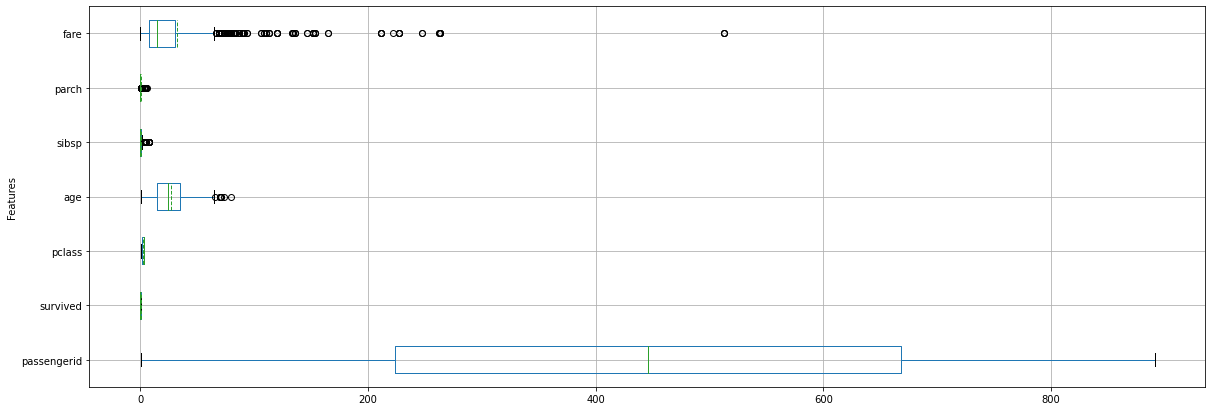

In [ ]:
#check nas features antes de tratar os outliers e de fazer a transfromação
df_titanic.plot(kind = 'box', showmeans = True, meanline = True, grid = True
             , figsize = (20,7), vert = False, ylabel = 'Features')

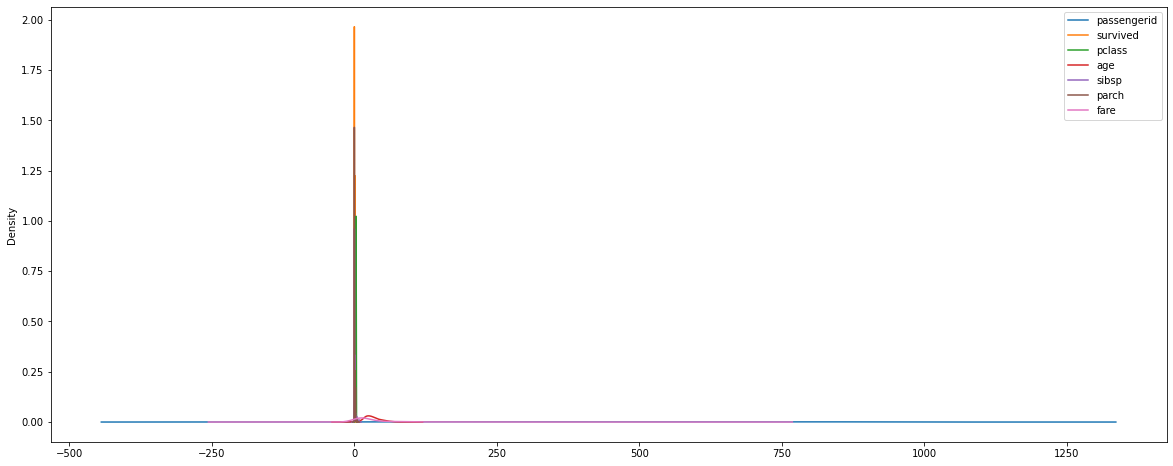

In [ ]:
#gráfico de densidade
df_titanic.plot(kind = 'kde', figsize = (20,8))

In [ ]:
df_titanic_copy = df_titanic.copy()

In [ ]:
df_titanic_copy.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,pclass2,sibsp2,parch2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3,0,0


In [ ]:
df_titanic_copy.isna().sum(0)

passengerid      0
survived         0
pclass           0
name             0
sex              0
age              0
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
pclass2          0
sibsp2           0
parch2           0
dtype: int64

In [ ]:
df_titanic_copy.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age              0
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
pclass2          0
sibsp2           0
parch2           0
dtype: int64

In [ ]:
mediana_age = df_titanic['age'].median()
mediana_age = df_titanic['fare'].median()


In [ ]:
df_titanic['age'].fillna(mediana_age, inplace = True)

In [ ]:
#calcula a percentagem dos dados faltantes
round(df_titanic_copy.isna().sum(0)/len(df_titanic_copy)*100, 2)

passengerid     0.00
survived        0.00
pclass          0.00
name            0.00
sex             0.00
age             0.00
sibsp           0.00
parch           0.00
ticket          0.00
fare            0.00
cabin          77.10
embarked        0.22
pclass2         0.00
sibsp2          0.00
parch2          0.00
dtype: float64

In [ ]:
l_coluna = df_titanic_copy.columns
l_coluna

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'pclass2', 'sibsp2',
       'parch2'],
      dtype='object')

In [ ]:
#df_titanic_copy.drop(columns=['passengerid', 'survived', 'pclass', 'name', 'sex', 'sibsp',
#       'parch', 'ticket', 'cabin', 'embarked', 'pclass2'], axis = 1, inplace=True)

In [ ]:
df_titanic_copy.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,pclass2,sibsp2,parch2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3,0,0


In [ ]:
df_titanic_copy['fare'].median()

14.4542

In [ ]:
df_titanic_copy['age'].median()

24.0

In [ ]:
df_titanic_copy[['fare', 'age']]

,fare,age
0,7.2500,22.0000
1,71.2833,38.0000
2,7.9250,26.0000
3,53.1000,35.0000
4,8.0500,35.0000
...,...,...
886,13.0000,27.0000
887,30.0000,19.0000
888,23.4500,14.4542
889,30.0000,26.0000


In [ ]:
#antes do tratamento dos outliers
df_titanic_copy[['fare', 'age']].describe()

,fare,age
count,891.000000,891.000000
mean,32.204208,26.670666
std,49.693429,14.355868
min,0.000000,0.420000
25%,7.910400,14.454200
50%,14.454200,24.000000
75%,31.000000,35.000000
max,512.329200,80.000000


In [ ]:
#função conta os outliers acima do limSup e dp limInf
def outliers_conta(df):
    Q1 = df.quantile(q=0.25)
    Q3 = df.quantile(q=0.75)
    IQR = Q3 - Q1
    Linf = Q1 - (1.5*IQR)
    Lsup = Q3 + (1.5*IQR)
    l_col = df.columns
    l_col
    dic_out ={}
    for col in l_col:
        #print(df_boston[col])
        val_sup = 0
        val_inf = 0
        for c in range(0, len(df[col])):
            #print(df_boston[col][c])
            if df[col][c] > Lsup[col]:
                val_sup = val_sup + 1#conta os acima do limSup
            elif df[col][c] < Linf[col]:
                val_inf = val_inf + 1#conta os abaixo do limInf
        dic_out[col]=[len(df[col]), val_sup, val_inf]
    for k, v in dic_out.items():
        print(k,v)


In [ ]:
#passando das duas features 'age' e 'fare' para contar os outleirs
outliers_conta(df_titanic_copy[['age', 'fare']])

age [891, 8, 0]
fare [891, 116, 0]


/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Text(0.5, 1.0, 'box fare')

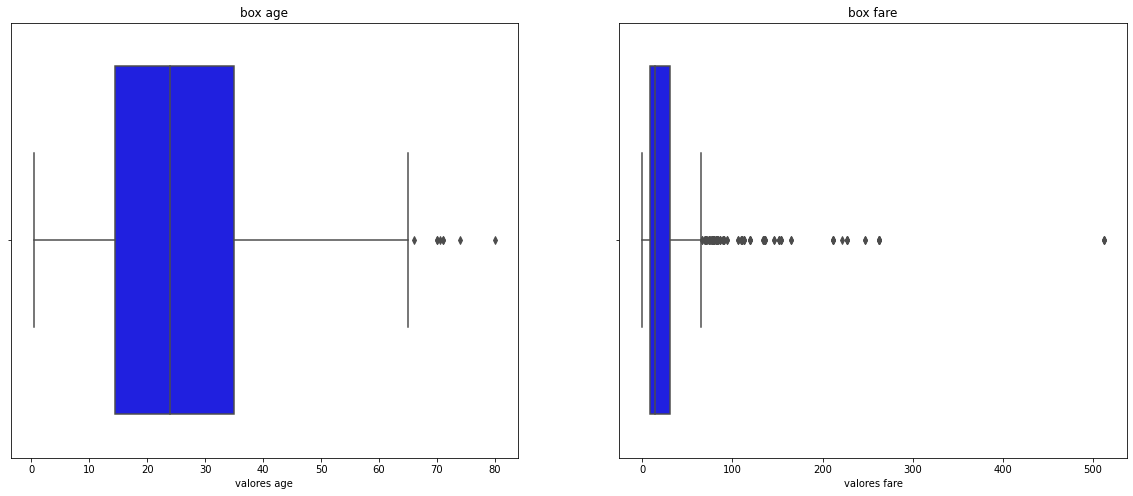

In [ ]:
#plota usando o Seaborn
plt.figure(figsize = (20,8))
plt.subplot(1,2, 1)
fig = sns.boxplot(x = 'age', data = df_titanic_copy, orient= 'v', color = 'b')
fig.set_xlabel('valores age')
fig.set_title('box age')

plt.subplot(1,2, 2)
fig = sns.boxplot(x = 'fare', data = df_titanic_copy, orient= 'v', color = 'b')
fig.set_xlabel('valores fare')
fig.set_title('box fare')

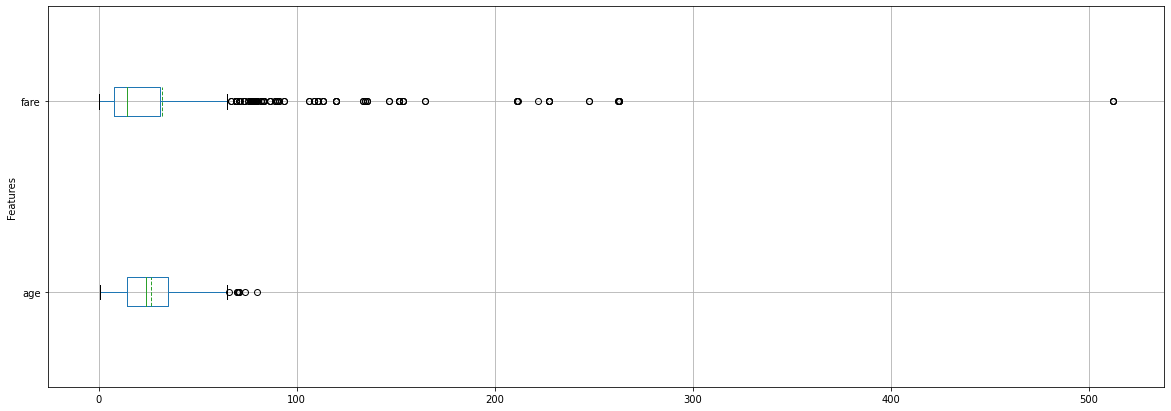

In [ ]:
#check nas features antes de tratar os outliers e de fazer a transfromação
#plot age e fare 
df_titanic_copy[['age', 'fare']].plot(kind = 'box', showmeans = True, meanline = True, grid = True, figsize = (20,7), vert = False, ylabel = 'Features')

In [ ]:
#dados estatísricos das variaveis age e fare
df_titanic_copy[['age', 'fare']].describe()

,age,fare
count,891.000000,891.000000
mean,26.670666,32.204208
std,14.355868,49.693429
min,0.420000,0.000000
25%,14.454200,7.910400
50%,24.000000,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


In [ ]:
df_titanic_copy['age'].median()

24.0

In [ ]:
df_titanic_copy['fare'].median()

14.4542

In [ ]:
l_col = df_titanic_copy.columns
l_col

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'pclass2', 'sibsp2',
       'parch2'],
      dtype='object')

In [ ]:
df_trat_af = df_titanic_copy.drop(columns=['passengerid', 'survived', 'pclass', 'name', 'sex', 'sibsp'
                                           , 'parch', 'ticket', 'cabin', 'embarked', 'pclass2', 'sibsp2', 'parch2'])

In [ ]:
df_trat_af

,age,fare
0,22.0000,7.2500
1,38.0000,71.2833
2,26.0000,7.9250
3,35.0000,53.1000
4,35.0000,8.0500
...,...,...
886,27.0000,13.0000
887,19.0000,30.0000
888,14.4542,23.4500
889,26.0000,30.0000


In [ ]:
#função substitui os outliers pela median()
def sub_outliers_median(df):
    Q1 = df.quantile(q=0.25)
    Q3 = df.quantile(q=0.75)
    IQR = Q3 - Q1
    Linf = Q1 - (1.5*IQR)
    Lsup = Q3 + (1.5*IQR)
    l_col = df.columns
    l_col
    for col in l_col:
        for c in range(0, len(df[col])):
            #print(df_boston[col][c])
            if (df[col][c] > Lsup[col]):
                df[col][c] = df[col].median() #atribui a median aos acima do limSup
            elif (df[col][c] < Linf[col]):
                df[col][c] = df[col].median()

In [ ]:
sub_outliers_median(df_trat_af)

In [ ]:
df_trat_af.describe()

,age,fare
count,891.000000,891.000000
mean,26.243618,17.383622
std,13.701414,12.713016
min,0.420000,0.000000
25%,14.454200,7.910400
50%,24.000000,14.454200
75%,35.000000,24.150000
max,65.000000,65.000000


In [ ]:
#substituindo age e fare pela (age e fare com os outliers tratados )
df_titanic_copy['age'] = df_trat_af['age'].copy()
df_titanic_copy['fare'] = df_trat_af['fare'].copy()

In [ ]:
df_titanic_copy.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,26.243618,0.523008,0.381594,17.383622
std,257.353842,0.486592,0.836071,13.701414,1.102743,0.806057,12.713016
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,14.454200,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,24.150000
max,891.000000,1.000000,3.000000,65.000000,8.000000,6.000000,65.000000


In [ ]:
df_titanic_copy.isna().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age              0
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
pclass2          0
sibsp2           0
parch2           0
dtype: int64

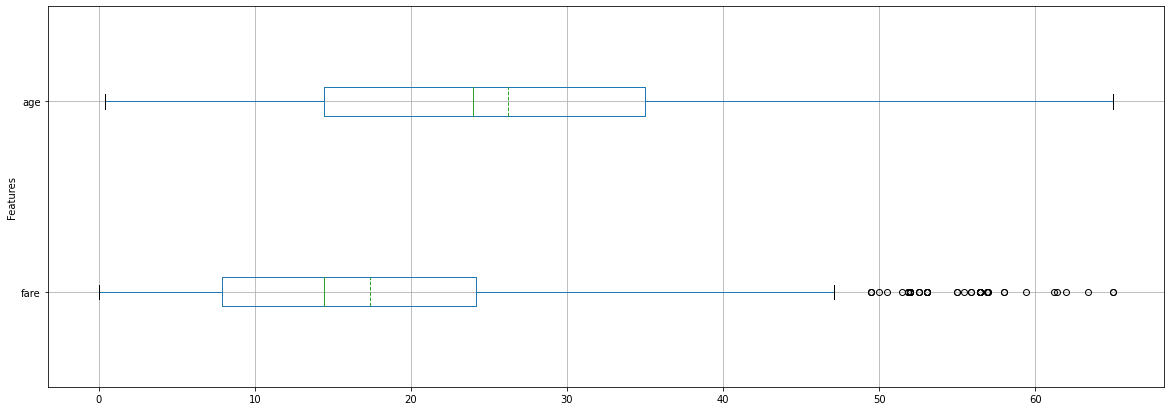

In [ ]:
#check nas features depois de tratar os outliers 
df_titanic_copy[['fare', 'age']].plot(kind = 'box', showmeans = True, meanline = True, grid = True, figsize = (20,7), vert = False, ylabel = 'Features')

In [ ]:
#queda de 116 para 48 em fare e 11 para 4 na age
outliers_conta(df_titanic_copy[['age', 'fare']])

age [891, 0, 0]
fare [891, 48, 0]


In [ ]:
df_titanic_copy.isna().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age              0
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
pclass2          0
sibsp2           0
parch2           0
dtype: int64

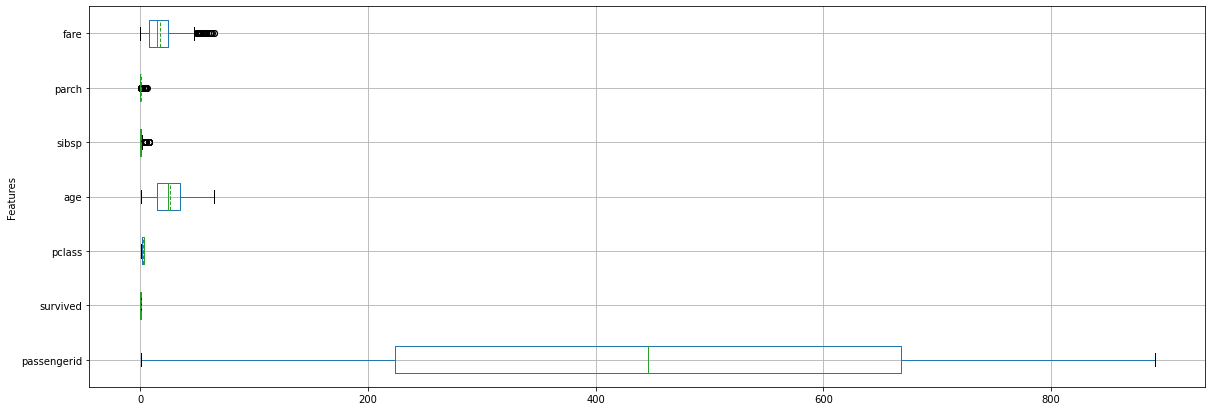

In [ ]:
#check nas features depois de tratar os outliers 
df_titanic_copy.plot(kind = 'box', showmeans = True, meanline = True, grid = True, figsize = (20,7), vert = False, ylabel = 'Features')

In [ ]:
df_titanic_copy.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,pclass2,sibsp2,parch2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,14.4542,C85,C,1,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3,0,0


In [ ]:
#teste criando novo df
#df = pd.get_dummies(df, columns=['type'])
df_titanic_copy_1 = pd.get_dummies(df_titanic_copy, columns=['sex'])

In [ ]:
df_titanic_copy_1.head()

,passengerid,survived,pclass,name,age,sibsp,parch,ticket,fare,cabin,embarked,pclass2,sibsp2,parch2,sex_female,sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,3,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,14.4542,C85,C,1,1,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,1,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,3,0,0,0,1


In [ ]:
l_coluna = df_titanic_copy.columns
l_coluna

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'pclass2', 'sibsp2',
       'parch2'],
      dtype='object')

In [ ]:
#drop as colunas com baixa importancia
df_titanic_drop = df_titanic_copy.drop(columns=['name', 'parch', 'ticket', 'cabin', 'embarked', 'parch2'], axis =1)


In [ ]:
#df com as colunas mais importantes
df_titanic_drop.head()

,passengerid,survived,pclass,sex,age,sibsp,fare,pclass2,sibsp2
0,1,0,3,male,22.0,1,7.2500,3,1
1,2,1,1,female,38.0,1,14.4542,1,1
2,3,1,3,female,26.0,0,7.9250,3,0
3,4,1,1,female,35.0,1,53.1000,1,1
4,5,0,3,male,35.0,0,8.0500,3,0


In [ ]:
#fazendo o dummies da coluna sex no df_titanic_drop
#df = pd.get_dummies(df, columns=['type'])
df_titanic_drop = pd.get_dummies(df_titanic_drop, columns=['sex'])

In [ ]:
df_titanic_drop.head()

,passengerid,survived,pclass,age,sibsp,fare,pclass2,sibsp2,sex_female,sex_male
0,1,0,3,22.0,1,7.2500,3,1,0,1
1,2,1,1,38.0,1,14.4542,1,1,1,0
2,3,1,3,26.0,0,7.9250,3,0,1,0
3,4,1,1,35.0,1,53.1000,1,1,1,0
4,5,0,3,35.0,0,8.0500,3,0,0,1


###PREPARANDO PARA APLICAR O MMS

In [ ]:
#colunas do df após o drop
l_col_df_drop = df_titanic_drop.columns
l_col_df_drop

Index(['passengerid', 'survived', 'pclass', 'age', 'sibsp', 'fare', 'pclass2',
       'sibsp2', 'sex_female', 'sex_male'],
      dtype='object')

In [ ]:
#importando o MinMaxScaler
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

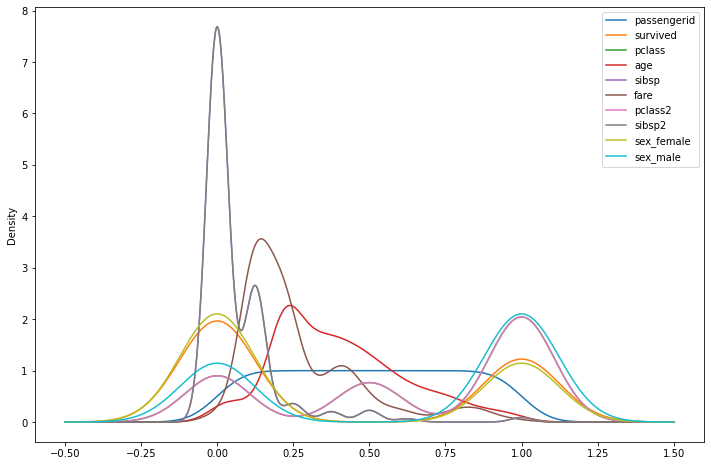

In [ ]:
#aplicando a tranformação MinMaxScaler
titanic_MinMaxScaler = MinMaxScaler().fit_transform(df_titanic_drop)
df_titanic_MinMaxScaler = pd.DataFrame(titanic_MinMaxScaler,columns = ['passengerid', 'survived', 'pclass', 'age', 'sibsp', 'fare', 'pclass2',
       'sibsp2', 'sex_female', 'sex_male'])

# Gráfico
df_titanic_MinMaxScaler.plot(kind = 'kde', figsize = (12,8))

In [ ]:
#copia do df transformado pelo MinMaxScale
df_titanic_MMS = df_titanic_MinMaxScaler.copy()

In [ ]:
df_titanic_MMS.head()

,passengerid,survived,pclass,age,sibsp,fare,pclass2,sibsp2,sex_female,sex_male
0,0.000000,0.0,1.0,0.334159,0.125,0.111538,1.0,0.125,0.0,1.0
1,0.001124,1.0,0.0,0.581914,0.125,0.222372,0.0,0.125,1.0,0.0
2,0.002247,1.0,1.0,0.396098,0.000,0.121923,1.0,0.000,1.0,0.0
3,0.003371,1.0,0.0,0.535460,0.125,0.816923,0.0,0.125,1.0,0.0
4,0.004494,0.0,1.0,0.535460,0.000,0.123846,1.0,0.000,0.0,1.0


In [ ]:
# 5ª versão do modelo após a tratar outliers e aplicar o MMS


modelo4 = smf.glm(formula = 'survived ~ pclass + age + sibsp + fare + pclass2 + sibsp2 + sex_female + sex_male',
                  data = df_titanic_MMS, 
                  family = sm.families.Binomial()).fit()

print(modelo4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      885
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -398.57
Date:                Thu, 29 Oct 2020   Deviance:                       797.14
Time:                        19:26:03   Pearson chi2:                     905.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2152      0.237      5.118      0.0

In [ ]:
# 6ª versão do modelo após a tratar outliers e aplicar o MMS
#descartando fare


modelo4 = smf.glm(formula = 'survived ~ pclass + age + sibsp + pclass2 + sibsp2 + sex_female + sex_male',
                  data = df_titanic_MMS, 
                  family = sm.families.Binomial()).fit()

print(modelo4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      886
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -400.35
Date:                Thu, 29 Oct 2020   Deviance:                       800.70
Time:                        19:26:14   Pearson chi2:                     915.
No. Iterations:                    66                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4510      0.204      7.126      0.0

# Exemplo 2

In [ ]:
# Carrega as bibliotecas
import numpy as np
np.set_printoptions(formatter = {'float': lambda x: "{0:0.2f}".format(x)})

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

%matplotlib inline

In [ ]:
# Carregar/ler o banco de dados - Dataframe Diabetes
from sklearn import datasets
#Diabetes = datasets.load_diabetes()

url = 'https://raw.githubusercontent.com/MathMachado/DSWP/master/Dataframes/diabetes.csv'
diabetes = pd.read_csv(url)
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Definir as matrizes X e y
X_diabetes = diabetes.copy()
X_diabetes.drop(columns = ['Outcome'], axis = 1, inplace = True)
y_diabetes = diabetes['Outcome']

X_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
X_diabetes.shape

(768, 8)

In [ ]:
y_diabetes.shape

(768,)

In [ ]:
# Definir as matrizes de treinamento e validação
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X_diabetes, y_diabetes)

In [ ]:
# Usando statmodels:
x = sm.add_constant(X_treinamento)
lr_sm = sm.Logit(y_treinamento, X_treinamento) # Atenção: aqui é o contrário: [y, x]

# Treinar o modelo
lr.fit(X_treinamento, y_treinamento)
resultado_sm = lr_sm.fit()

Optimization terminated successfully.
         Current function value: 0.601654
         Iterations 5


In [ ]:
resultado_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  576
Model:                          Logit   Df Residuals:                      568
Method:                           MLE   Df Model:                            7
Date:                Tue, 27 Oct 2020   Pseudo R-squ.:                 0.07286
Time:                        19:38:05   Log-Likelihood:                -346.55
converged:                       True   LL-Null:                       -373.79
Covariance Type:            nonrobust   LLR p-value:                 1.898e-09
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1323      0.033      4.051      0.000       0.068       0.196
Glucose                      0.0118      0.003      3.693      0.000       0.006       0.018
BloodPressure               -0.0335      0.006     -5.734      0.000      -0.045      -0.022
SkinThickness               -0.0050      0.007     -0.721      0.471      -0.019       0.009
Insulin                      0.0013      0.001      1.395      0.163      -0.001       0.003
BMI                          0.0052      0.013      0.398      0.691      -0.021       0.031
DiabetesPedigreeFunction     0.3435      0.296      1.159      0.246      -0.237       0.924
Age                         -0.0128      0.010     -1.314      0.189      -0.032       0.006
============================================================================================
"""

In [ ]:
# EQM - Erro Quadrático Médio
np.mean((resultado_sm.predict(X_teste) - y_teste) ** 2) 

0.21922749570243685

### Calcular y_pred - os valores preditos de y

In [ ]:
y_pred = resultado_sm.predict(X_treinamento)

In [ ]:
compara = list(zip(np.array(diabetes['Outcome']), resultado_sm.predict()))
compara[0:30]

[(1, 0.6706945042917652),
 (0, 0.36148782460160817),
 (1, 0.8827443662919776),
 (0, 0.22498931646461837),
 (1, 0.47401799492897084),
 (0, 0.42258551414969914),
 (1, 0.34560864446329936),
 (0, 0.3014349903775806),
 (1, 0.48557977126715995),
 (1, 0.584149208116226),
 (0, 0.4230961993592932),
 (1, 0.2956582590521676),
 (0, 0.33078220019979565),
 (1, 0.2991911901663404),
 (1, 0.8096876145928085),
 (1, 0.21116639066092016),
 (1, 0.6839540606169083),
 (1, 0.26390763524091077),
 (0, 0.4232380816141412),
 (1, 0.6173254112005374),
 (0, 0.6489304861778604),
 (0, 0.5132077218423531),
 (1, 0.597530130029493),
 (1, 0.27935954177613725),
 (1, 0.24378704984487137),
 (1, 0.32308977216663454),
 (1, 0.37523090910483115),
 (0, 0.8601709021467143),
 (0, 0.5823539675706273),
 (0, 0.33816696743511704)]

In [ ]:
resultado_sm.pred_table()

array([[327.00, 46.00],
       [122.00, 81.00]])

In [ ]:
confusion_matrix = pd.DataFrame(resultado_sm.pred_table())
confusion_matrix.columns = ['Predicted No Diabetes', 'Predicted Diabetes']
confusion_matrix = confusion_matrix.rename(index = {0 : 'Actual No Diabetes', 1 : 'Actual Diabetes'})
confusion_matrix

,Predicted No Diabetes,Predicted Diabetes
Actual No Diabetes,327.0,46.0
Actual Diabetes,122.0,81.0


In [ ]:
cm = np.array(confusion_matrix)
training_accuracy = (cm[0,0] + cm[1,1])/ cm.sum()
training_accuracy

0.7083333333333334

# Exercício 1 - Mall_Customers.csv
> A variável-target deste dataframe é 'Annual Income'. Desenvolva um modelo de regressão utilizando OLS, Ridge e LASSO e compare os resultados.

* Experimente:
    * Lasso(alpha = 0.01, max_iter = 10e5);
    * Lasso(alpha = 0.0001, max_iter = 10e5);
    * Ridge(alpha = 0.01);
    * Ridge(alpha = 100);

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

## Dados

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe (1/0) a term deposit (variable y).

This dataset provides the customer information. It includes 41188 records and 21 fields.

In [ ]:
df_bank = pd.read_csv('https://raw.githubusercontent.com/MathMachado/DataFrames/master/bank-full.csv', header = 0)
df_bank = df_bank.dropna()
print(df_bank.shape)
print(list(df_bank.columns))

(45211, 1)
['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"']


In [ ]:
df_bank.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


#### Input variables

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - (numeric)

17 - cons.price.idx: consumer price index - (numeric)

18 - cons.conf.idx: consumer confidence index - (numeric) 

19 - euribor3m: euribor 3 month rate - (numeric)

20 - nr.employed: number of employees - (numeric)

#### Predict variable (desired target):

y - has the client subscribed a term deposit? (binary: '1','0')

The education column of the dataset has many categories and we need to reduce the categories for a better modelling. The education column has the following categories:

In [ ]:
df_bank['education'].unique()

KeyError: ignored

Let us group "basic.4y", "basic.9y" and "basic.6y" together and call them "basic".

In [ ]:
df_bank['education']=np.where(df_bank['education'] =='basic.9y', 'Basic', df_bank['education'])
df_bank['education']=np.where(df_bank['education'] =='basic.6y', 'Basic', df_bank['education'])
df_bank['education']=np.where(df_bank['education'] =='basic.4y', 'Basic', df_bank['education'])

After grouping, this is the columns

In [ ]:
df_bank['education'].unique()

### Data exploration

In [ ]:
df_bank['y'].value_counts()

In [ ]:
sns.countplot(x='y',data=df_bank, palette='hls')
plt.show()
plt.savefig('count_plot')

There are 36548 no's and 4640 yes's in the outcome variables.

Let's get a sense of the numbers across the two classes

In [ ]:
df_bank.groupby('y').mean()

Observations:

The average age of customers who bought the term deposit is higher than that of the customers who didn't.
The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.
Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.

In [ ]:
df_bank.groupby('job').mean()

In [ ]:
df_bank.groupby('marital').mean()

In [ ]:
df_bank.groupby('education').mean()

Visualizations

In [ ]:
%matplotlib inline
pd.crosstab(df_bank.job,df_bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

In [ ]:
table=pd.crosstab(df_bank.marital,df_bank.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

Hard to see, but the marital status does not seem a strong predictor for the outcome variable.

In [ ]:
table=pd.crosstab(df_bank.education,df_bank.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

Education seems a good predictor of the outcome variable.

In [ ]:
pd.crosstab(df_bank.day_of_week,df_bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

Day of week may not be a good predictor of the outcome

In [ ]:
pd.crosstab(df_bank.month,df_bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

Month might be a good predictor of the outcome variable

In [ ]:
df_bank.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

The most of the customers of the bank in this dataset are in the age range of 30-40.

In [ ]:
pd.crosstab(df_bank.poutcome,df_bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

Poutcome seems to be a good predictor of the outcome variable.

### Create dummy variables

In [ ]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df_bank[var], prefix=var)
    df_bank1=df_bank.join(cat_list)
    data=df_bank1

In [ ]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
df_bank_vars=df_bank.columns.values.tolist()
to_keep=[i for i in df_bank_vars if i not in cat_vars]

In [ ]:
df_bank_final=df_bank[to_keep]
df_bank_final.columns.values

In [ ]:
df_bank_final_vars=df_bank_final.columns.values.tolist()
y=['y']
X=[i for i in df_bank_final_vars if i not in y]

### Feature Selection

In [ ]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 18)
rfe = rfe.fit(df_bank_final[X], df_bank_final[y] )
print(rfe.support_)
print(rfe.ranking_)

The Recursive Feature Elimination (RFE) has helped us select the following features: "previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", "poutcome_failure", "poutcome_nonexistent", "poutcome_success".

In [ ]:
cols=["previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", 
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", 
      "poutcome_failure", "poutcome_nonexistent", "poutcome_success"] 
X=df_bank_final[cols]
y=df_bank_final['y']

### Implementing the model

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

The p-values for most of the variables are very small, therefore, most of them are significant to the model.

### Logistic Regression Model Fitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#### Predicting the test set results and caculating the accuracy

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

### Cross Validation

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

The result is telling us that we have 10872+254 correct predictions and 1122+109 incorrect predictions.

#### Accuracy

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

#### Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#### Interpretation: 

Of the entire test set, 88% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 90% of the customer's preferred term deposit were promoted.

### ROC Curvefrom sklearn import metrics
from ggplot import *

prob = clf1.predict_proba(X_test)[:,1]
fpr, sensitivity, _ = metrics.roc_curve(Y_test, prob)

df = pd.DataFrame(dict(fpr=fpr, sensitivity=sensitivity))
ggplot(df, aes(x='fpr', y='sensitivity')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()